In [1]:
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
from numba import njit, jit, prange
from scipy.special import voigt_profile, rel_entr
from scipy.stats import norm


### Metropolis-Hastings sampling from Voigt distribution

In [140]:

def sampler(p, N, step=1e-1):
    q = norm(0.0, step)
    delta = q.rvs(N-1)
    u = np.random.uniform(0, 1, N-1)
    accepted = 0

    xc = np.random.normal(0.0, 1.0)
    samples = [xc]

    for i in range(N-1):
        xt = xc + delta[i]
        a = p(xt) * q.pdf(xc-xt) / (p(xc) * q.pdf(xt-xc))
        
        if a > u[i]:
            xc = xt
            accepted += 1

        samples.append(xc)

    p_accept = accepted / (N-1)

    return np.array(samples), p_accept

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 1.000e+00,
        6.000e+00, 3.000e+00, 3.000e+00, 8.000e+00, 1.100e+01, 1.700e+01,
        2.700e+01, 3.200e+01, 3.900e+01, 4.500e+01, 7.500e+01, 8.400e+01,
        9.100e+01, 1.160e+02, 1.720e+02, 2.150e+02, 2.550e+02, 3.020e+02,
        4.450e+02, 4.620e+02, 6.300e+02, 6.500e+02, 8.050e+02, 9.430e+02,
        1.071e+03, 1.261e+03, 1.394e+03, 1.623e+03, 1.765e+03, 1.914e+03,
        2.124e+03, 2.483e+03, 2.742e+03, 2.848e+03, 2.987e+03, 3.153e+03,
        3.412e+03, 3.427e+03, 3.481e+03, 3.659e+03, 3.674e+03, 3.657e+03,
        3.662e+03, 3.581e+03, 3.560e+03, 3.388e+03, 3.293e+03, 3.199e+03,
        3.015e+03, 2.764e+03, 2.606e+03, 2.380e+03, 2.147e+03, 1.989e+03,
        1.747e+03, 1.568e+03, 1.423e+03, 1.201e+03, 1.045e+03, 8.960e+02,
        7.520e+02, 6.710e+02, 5.790e+02, 4.660e+02, 3.980e+02, 3.060e+02,
        2.620e+02, 2.280e+02, 1.660e+0

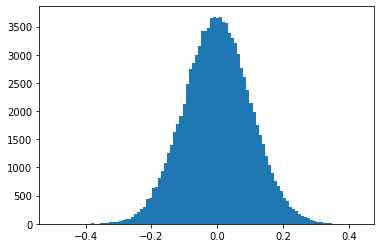

In [27]:
step = 1e-1
N = int(1e5)
q = norm(0.0, step)
delta = q.rvs(N-1)

plt.hist(delta, bins=100)

0.6953476738369184


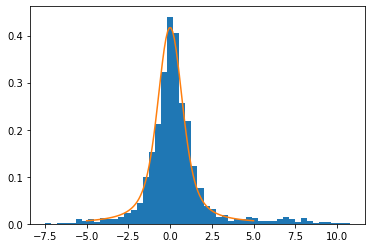

In [28]:
# p = lambda x: voigt_profile(x, 1.0, 0.1)

def voigt(x, alpha):
    return voigt_profile(x, alpha, 1.0-alpha)

p = lambda x: voigt(x, 0.5)

samples, acc_rate = sampler(p, 2000, step=1e0)
print(acc_rate)

x = np.linspace(-5,5,100)
plt.hist(samples, density=True, bins=50)
plt.plot(x, p(x))

In [50]:
N = int(1e3)

alpha = np.linspace(0, 1, 21)
mean = []
std = []
acceptance = []

for a in alpha:
    p = lambda x: voigt(x, a)
    samples, acc_rate = sampler(p, 2000, step=1e0)

    mean_t = np.mean(samples)
    std_t = np.sqrt(np.mean(samples ** 2) - mean_t**2)

    std.append(std_t)
    mean.append(mean_t)
    acceptance.append(acc_rate)

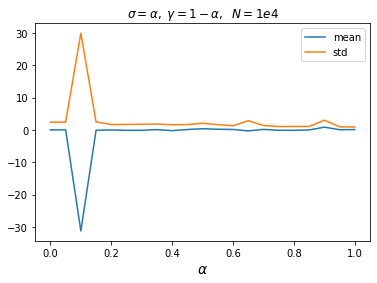

In [51]:
plt.plot(alpha, mean, label="mean")
plt.plot(alpha, std, label="std")

plt.xlabel("$\\alpha$", fontsize=14)
plt.title("$\sigma = \\alpha, \; \gamma = 1-\\alpha, \; \; N=1e4$")
plt.legend()

In [109]:
# Можно бинировать одномерные данные для энергии, мы знаем нужное распределение
p = lambda x: voigt(x, 0.5)
N = int(5e3)
bin_step = 0.1
cut = 8
steps = np.logspace(-2,1,20)
alphas = np.linspace(0.0, 1.0, 11)
res = []

for alpha in alphas:
    temp = []
    p = lambda x: voigt(x, alpha)
    for step in steps:
        samples, acc_rate = sampler(p, N, step=step)

        q_probs, bins = np.histogram(samples, bins=np.arange(-cut,cut,bin_step), density=True)
        p_probs = p(bins[1:])

        temp.append(np.sum(rel_entr(q_probs, p_probs)) * bin_step)
    res.append(temp)

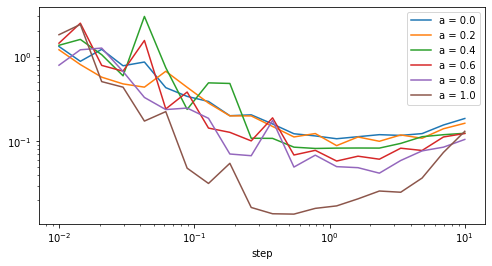

In [120]:
plt.figure(figsize=(8,4))
for i in range(0, len(alphas), 2):
    plt.loglog(steps, res[i][:20], label="a = {}".format(round(alphas[i], 2)))
    plt.xlabel("step")
    # plt.ylim(0.0, 1.0)

plt.legend()

/var/folders/h9/ll8t8frd1r575llt96l1glhm0000gn/T/ipykernel_43580/897219337.py:1: RuntimeWarning: divide by zero encountered in log2
  kl = lambda x: x*np.log2(x)
/var/folders/h9/ll8t8frd1r575llt96l1glhm0000gn/T/ipykernel_43580/897219337.py:1: RuntimeWarning: invalid value encountered in multiply
  kl = lambda x: x*np.log2(x)


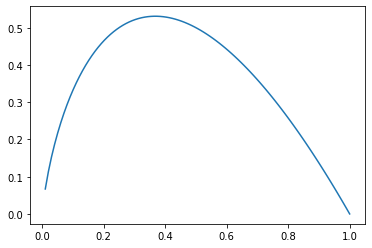

In [87]:
kl = lambda x: x*np.log2(x)

x = np.linspace(0, 1, 100)
plt.plot(x, -kl(x))

In [134]:
from scipy.stats import cauchy, norm

samples = cauchy().rvs(1000)
samples_gauss = norm().rvs(1000)

Text(0, 0.5, 'Expectation value')

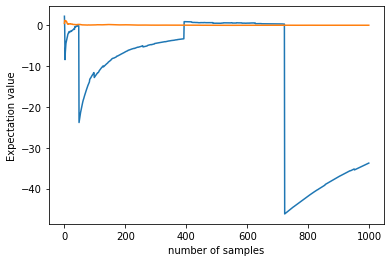

In [135]:
n = np.arange(1, 1001)

plt.plot(np.cumsum(samples) / n)
plt.plot(np.cumsum(samples_gauss) / n)

plt.xlabel("number of samples")

plt.ylabel("Expectation value")

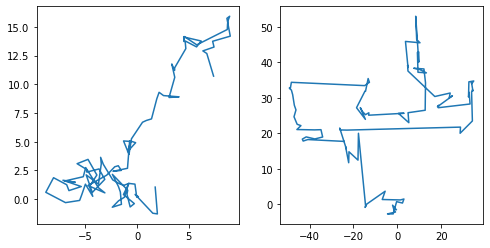

In [139]:
n = 100
delta_cauchy_x, delta_cauchy_y = cauchy().rvs(n), cauchy().rvs(n)
delta_norm_x, delta_norm_y = norm().rvs(n), norm().rvs(n)

x_cauchy, y_cauchy = np.cumsum(delta_cauchy_x), np.cumsum(delta_cauchy_y)
x_norm, y_norm = np.cumsum(delta_norm_x), np.cumsum(delta_norm_y)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(x_norm, y_norm)

plt.subplot(122)
plt.plot(x_cauchy, y_cauchy)

In [142]:

def sampler(p, q, N):
    delta = q.rvs(N-1)
    u = np.random.uniform(0, 1, N-1)
    accepted = 0

    xc = np.random.normal(0.0, 1.0)
    samples = [xc]

    for i in range(N-1):
        xt = xc + delta[i]
        a = p(xt) * q.pdf(xc-xt) / (p(xc) * q.pdf(xt-xc))
        
        if a > u[i]:
            xc = xt
            accepted += 1

        samples.append(xc)

    p_accept = accepted / (N-1)

    return np.array(samples), p_accept

In [146]:
# Можно бинировать одномерные данные для энергии, мы знаем нужное распределение
p = lambda x: voigt(x, 0.5)

N = int(5e3)
bin_step = 0.1
cut = 8
steps = np.logspace(-2,1,20)
res_norm = []
res_cauchy = []


for step in steps:
    q_norm = norm(0.0, step)
    q_cauchy = cauchy(0.0, step)

    samples_norm, _ = sampler(p, q_norm, N)
    samples_cauchy, _ = sampler(p, q_cauchy, N)

    q_probs_norm, bins_norm = np.histogram(samples_norm, bins=np.arange(-cut,cut,bin_step), density=True)
    p_probs_norm = p(bins_norm[1:])
    res_norm.append(np.sum(rel_entr(q_probs_norm, p_probs_norm)) * bin_step)

    q_probs_cauchy, bins_cauchy = np.histogram(samples_cauchy, bins=np.arange(-cut,cut,bin_step), density=True)
    p_probs_cauchy = p(bins_cauchy[1:])
    res_cauchy.append(np.sum(rel_entr(q_probs_cauchy, p_probs_cauchy)) * bin_step)


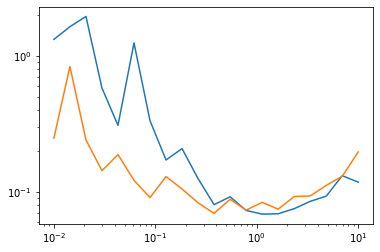

In [148]:
plt.loglog(steps, res_norm)
plt.loglog(steps, res_cauchy)

In [159]:
s = "23iopfweofpwefwefwefwpfeqewipngpg-304gj-qngnspgpoqpfew"

list(map(lambda x: (s.count(x), x), s)) #Сложность N^2
#filter(condition, list)


# Чтобы писать хороший код, нужно знать особенности структур данных языка. Сколько тратится на
# создание, поиск максимума, ...

[(1, '2'),
 (2, '3'),
 (2, 'i'),
 (3, 'o'),
 (8, 'p'),
 (7, 'f'),
 (7, 'w'),
 (7, 'e'),
 (3, 'o'),
 (7, 'f'),
 (8, 'p'),
 (7, 'w'),
 (7, 'e'),
 (7, 'f'),
 (7, 'w'),
 (7, 'e'),
 (7, 'f'),
 (7, 'w'),
 (7, 'e'),
 (7, 'f'),
 (7, 'w'),
 (8, 'p'),
 (7, 'f'),
 (7, 'e'),
 (3, 'q'),
 (7, 'e'),
 (7, 'w'),
 (2, 'i'),
 (8, 'p'),
 (3, 'n'),
 (5, 'g'),
 (8, 'p'),
 (5, 'g'),
 (2, '-'),
 (2, '3'),
 (1, '0'),
 (1, '4'),
 (5, 'g'),
 (1, 'j'),
 (2, '-'),
 (3, 'q'),
 (3, 'n'),
 (5, 'g'),
 (3, 'n'),
 (1, 's'),
 (8, 'p'),
 (5, 'g'),
 (8, 'p'),
 (3, 'o'),
 (3, 'q'),
 (8, 'p'),
 (7, 'f'),
 (7, 'e'),
 (7, 'w')]

In [5]:
@jit()
def polynom(x, t1, t2):
    return np.abs(x**9 + 3*x**5 + (50 * t1**3 - 50*1j*t1**2 + 50*t1 - 50) * x + 50*t2**3 - 50*1j*t2**2 + 50*t2 - 50*1j)

@jit()
def unit(phi):
    return complex(np.cos(phi), np.sin(phi))


@jit(nopython=True, parallel=True)
def count_roots(n=100, eps=1e-1, a=1.0):
    x, y = [-a + i*2*a / n for i in range(n)], [-a + i*2*a / n for i in range(n)]
    phi1, phi2 = [2*np.pi * i / n for i in range(n)], [2*np.pi * i / n for i in range(n)]

    res = [[0 for _ in range(n)] for _ in range(n)]

    for i in prange(n):
        for j in prange(n):
            for k in prange(n):
                for m in prange(n):
                    if polynom(x[k] + 1j*y[m], unit(phi1[i]), unit(phi2[j])) < eps:
                        res[k][m] += 1
                
    return res

In [10]:
res = count_roots(n=200)

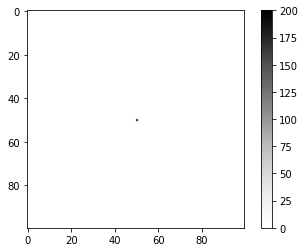

In [9]:
plt.imshow(res, cmap="Greys")
plt.colorbar()